# Deep Learning for Fonts | Fontastic

- Nischal HP | @nischalhp | VP, Engineering, omni:us

- Raghotham S | @raghothams | Senior Data Scientist, Ericsson Research

#### Strata Data Conference 2019, London

# Fontastic

## Motivation

<img src="imgs/london-bus.png" alt="drawing" width="600"/>



# Fontastic

### Existing Tools | What The Font

<img src="imgs/whatthefont.png" alt="drawing" width="600"/>


# Fontastic

### Existing Tools | What Font is?

<img src="imgs/whatfontis-1.png" alt="drawing" width="800" style="alig:center"/>

# Fontastic

### Existing Tools | What Font is?

<img src="imgs/whatfontis-2.png" alt="drawing" width="800" style="alig:center"/>

# Fontastic

### Existing Tools | Matcherator

<img src="imgs/matcherator.png" alt="drawing" width="800" style="alig:center"/>


# Fontastic

## What do we aim to do?

# Deep Learning for Humans

* Fontastic



* Upcoming Projects

# Fontastic

## Agenda

* Data acquisition
* Model building
* Feature visualization

# Fontastic

## Data Acquisition

## Data Acquisition

### Pass 1: Scrape Font Squirel - https://www.fontsquirrel.com/

<img src="imgs/fontsquirrel.png" alt="drawing" width="800" style="alig:center"/>


**Problems**

1. We have images of different dimensions
2. Even with normalizing the size, we will end up with 5-10 images per style


## Data Acquisition

### Pass 2: Scrape DaFont - https://www.dafont.com/

<img src="imgs/dafont.png" alt="drawing" width="800" style="alig:center"/>



**Problems**

1. Old school fonts only, not updated frequently
2. Supports only wide dimension, might not work well with inteded end use



## Data Acquisition

### Pass 3: Generate Image using PIL

#### Steps

1. Create 4 set of random texts
2. Generate 4k resolution image using the TTF for every random text
3. Take 10 random crop of size 256x256 px from the 4k image

With this we have the ability to generate large number of training images 


## Data Acquisition

### Pass 3: Generate Image using PIL

#### Advantages

1. We control the input text
2. We control the font style and size
3. We control the output image dinemsion


## Data Acquisition

### Pass 3: Generate Image using PIL


<img src="imgs/pil-generated.jpg" alt="drawing" width="800" style="alig:center"/>


## Data Acquisition

### Pass 3: Generate Image using PIL + Random Crop


<img src="imgs/pil-rand-crop.jpg" alt="drawing" width="800" style="alig:center"/>


## Data Acquisition

### Pass 3: Generate Image using PIL + Random Crop


<img src="imgs/pil-rand-crop-all.png" alt="drawing" width="800" style="alig:center"/>


# Fontastic

## Model Building

## Model Building
### Phase I | Feasibility Check - FastAI

In [30]:
PATH = "data/"
sz=225
arch=resnet50
bs=28

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

learn.fit(lr, 6, cycle_len=1)

[0.      1.05857 0.88758 0.6628 ]                           
[1.      0.69731 0.59468 0.77709]                            
[2.      0.51771 0.45974 0.84326]                            
[3.      0.4064  0.35457 0.86119]                            
[4.      0.34457 0.32807 0.87547]                            
[5.      0.26355 0.24554 0.91429]                            



## Model Building - Feasibility Check - FastAI

[[200   0   3   3   0   3   7]
 [  0  94   0   0   0   0   2]
 [  3   0 423   1   0   5   0]
 [  4   0   0 105   0   0  11]
 [  0   0   0   0 179   0   1]
 [  3   0  18   0   0 195   0]
 [  3   0   0   3   2   2 206]]


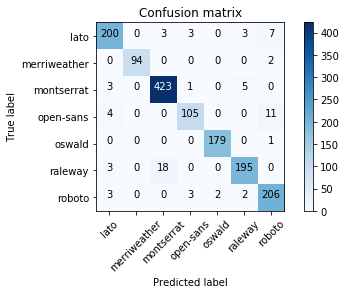

In [42]:
cm = confusion_matrix(y, preds)

plot_confusion_matrix(cm, data.classes)

## Model Building - 70 Fonts - PyTorch



### Why PyTorch?

* Easy to customize
* Flexible to integrate with other visualization projects

## Model Building - 70 Fonts - PyTorch



### Pretrained Model ResNet50

What is pretrained model? What is transfer learning?

<img src="imgs/transfer-learning.png" alt="drawing" width="800" style="alig:center"/>
<sub>Image Courtsey - https://medium.com/kansas-city-machine-learning-artificial-intelligen/an-introduction-to-transfer-learning-in-machine-learning-7efd104b6026</sub>

## Model Building - 70 Fonts - PyTorch



### Hyper Parameter Tuning



* Learning Rate

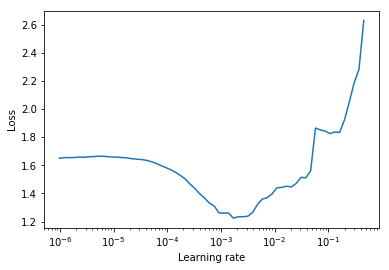

In [23]:
lrf.plot()

## Model Building - 70 Fonts - PyTorch



### Hyper Parameter Tuning


* Learning Rate Scheduler

In [ ]:
# Get Pretrained Model
model_ft = models.resnet50(pretrained=True)

# Customize FC Layer
num_frts = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_frts, len(class_names))

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

# Define optimizer & LR Scheduler
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

## Model Building - 70 Fonts - PyTorch



### Result - without LR finder & scheduler

# 0.74 f1-score after 40 epochs

## Model Building - 70 Fonts - PyTorch



### Result - with LR finder & scheduler

# 0.96 f1-score after 40 epochs

# Fontastic

## Feature Visualization 

 Mechanism to *See through the eyes of network*

## Feature Visualization 

### Gradcam Analysis

In [23]:
import pickle
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt


with open('./fd727d3f-73f4-4ec6-8e89-3e15fd3801b0resnet50_grad_cam', 'rb') as f:
    data = pickle.load(f)

def show_cam(epoch_slider, image_slider, layer_slider):
    plt.imshow(data[epoch_slider][image_slider][layer_slider])



## Feature Visualization 

### Gradcam Analysis

In [25]:
interact(show_cam, epoch_slider=widgets.IntSlider(min=0, max=len(data)-1, step=1, value=0),
                   image_slider=widgets.IntSlider(min=0, max=len(data[0])-1, step=1, value=0),
                   layer_slider=widgets.IntSlider(min=0, max=len(data[0][0])-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='epoch_slider', max=19), IntSlider(value=0, description='…

<function __main__.show_cam(epoch_slider, image_slider, layer_slider)>

## Feature Visualization 

### Activation Atlas

Activation Atlases not only reveal visual abstractions within a model, but they can reveal high-level misunderstandings in a model that can be exploited. For example, by looking at an activation atlas we will be able to see why a picture of a baseball can switch the classification of an image from “grey whale” to “great white shark”.


## Feature Visualization 

### Activation Atlas - https://distill.pub/2019/activation-atlas/

<img src="imgs/activation-atlas.png" alt="drawing" width="800" style="alig:center"/>


# Extra
## Remote Work


## Open Source

### https://github.com/deep-learning-for-humans/fontastic

# Fin.

## GH / twitter / everywhere
* **@nischalhp**

* **@raghothams**

https://github.com/deep-learning-for-humans/fontastic
